# penguins_adsgan stacking

Training on penguins dataset using adsgan model and stacking data

In [90]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Declare real dataset and split into train/test

In [91]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "adsgan"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [92]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [5]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-06T18:42:39.343413+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [01:01<14:44, 10.57it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [6]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [7]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-06T18:44:56.960279+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 849/10000 [02:08<23:06,  6.60it/s]  


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399  Chinstrap     Biscoe              38.0             16.3   
602     Gentoo     Biscoe              53.1             16.9   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435     Gentoo     Biscoe              49.3             15.4   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              186.8       3622.0  FEMALE  
602              231.0       6277.3    MALE  
61               188.0       4100.0 

# syn_v3

In [8]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [9]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-06T18:47:18.334771+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [02:49<40:40,  3.83it/s]  


[{'train':         species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
1112  Chinstrap   Dream              47.1             18.6              190.8   
966   Chinstrap   Dream              46.4             17.9              199.9   
598      Adelie   Dream              47.1             19.6              196.2   
170   Chinstrap   Dream              46.7             17.9              195.0   
275      Gentoo  Biscoe              45.7             13.9              214.0   
...         ...     ...               ...              ...                ...   
1095  Chinstrap   Dream              48.7             19.7              224.6   
1130     Adelie   Dream              36.4             19.4              188.5   
1294     Adelie  Biscoe              44.1             18.4              185.4   
860      Adelie  Biscoe              37.0             19.5              195.9   
1126     Adelie  Biscoe              35.9             20.1              191.0   

      body_mass_

# syn_v4

In [10]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-06T18:50:08.408760+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 799/10000 [06:22<1:13:20,  2.09it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Adelie  Torgersen              37.1             18.2   
1273     Adelie     Biscoe              46.0             20.0   
69       Adelie  Torgersen              42.8             18.5   
2539     Gentoo     Biscoe              42.8             15.8   
942      Adelie  Torgersen              37.7             19.8   
...         ...        ...               ...              ...   
1638     Adelie  Torgersen              46.7             19.9   
1095  Chinstrap      Dream              48.7             19.7   
1130     Adelie      Dream              36.4             19.4   
1294     Adelie     Biscoe              44.1             18.4   
860      Adelie     Biscoe              37.0             19.5   

      flipper_length_mm  body_mass_g     sex  
1011              199.8       4829.2  FEMALE  
1273              193.9       5375.9    MALE  
69                195.0       4250.0    MALE  
2539              21

# syn_v5

In [12]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-06T18:56:31.319327+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  4%|▍         | 449/10000 [06:59<2:28:51,  1.07it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054     Adelie      Dream              36.3             16.6   
120      Adelie  Torgersen              38.8             17.6   
2351     Adelie  Torgersen              38.0             19.7   
1907     Adelie      Dream              35.7             19.9   
3648     Gentoo     Biscoe              43.7             15.3   
...         ...        ...               ...              ...   
3092     Adelie      Dream              42.1             19.1   
3772     Gentoo     Biscoe              44.5             14.9   
5191     Adelie  Torgersen              38.9             20.6   
5226  Chinstrap      Dream              48.6             16.0   
860      Adelie     Biscoe              37.0             19.5   

      flipper_length_mm  body_mass_g     sex  
5054              192.4       4322.3  FEMALE  
120               191.0       3275.0  FEMALE  
2351              199.2       5942.0    MALE  
1907              19

# stack_v5 - Final stack

In [14]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [15]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method).Save("stack_v5")

[2024-05-06T19:03:32.366049+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  3%|▎         | 349/10000 [12:20<5:41:26,  2.12s/it] 


# stack_v5 (synth only)

In [16]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [17]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method).Save("stack_synth_only")

[2024-05-06T19:15:54.989006+0200][14816][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [23:13<5:34:35,  2.15s/it] 


# Generate synth data based on stack_v5

In [18]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
9876      Gentoo     Biscoe              46.2             15.7   
10068     Gentoo     Biscoe              54.3             17.0   
10316     Gentoo     Biscoe              46.3             15.0   
8622   Chinstrap      Dream              39.2             19.1   
8994   Chinstrap      Dream              38.1             18.6   
...          ...        ...               ...              ...   
5734   Chinstrap      Dream              47.5             19.4   
5191      Adelie  Torgersen              38.9             20.6   
5390      Adelie     Biscoe              35.7             19.0   
860       Adelie     Biscoe              37.0             19.5   
7270   Chinstrap      Dream              38.0             18.9   

       flipper_length_mm  body_mass_g     sex  
9876               231.0       6092.6  FEMALE  
10068              231.0       6161.4    MALE  
10316              218.8       5529.2    MALE  
8622

In [19]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [20]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
1381      Adelie  Torgersen              46.4             19.2   
7695      Gentoo     Biscoe              39.1             19.3   
10167  Chinstrap      Dream              49.4             19.3   
5550      Adelie      Dream              37.7             19.2   
1100      Gentoo     Biscoe              48.8             15.4   
...          ...        ...               ...              ...   
6068      Gentoo     Biscoe              49.6             16.6   
5525   Chinstrap      Dream              48.4             19.7   
5724      Adelie  Torgersen              41.4             19.1   
1194      Adelie     Biscoe              43.0             19.7   
7604      Gentoo     Biscoe              46.5             14.8   

       flipper_length_mm  body_mass_g     sex  
1381               228.9       5717.2    MALE  
7695               230.4       6239.8    MALE  
10167              204.0       4804.5  FEMALE  
5550

In [21]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [93]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Count of penguins_real
real_count = penguins_real.shape[0]

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.053061,0.009450,0.946939,0.009450
1,pca_eigval_diff,u,0.003889,NaN,0.996111,NaN
2,pca_eigvec_ang,u,0.065583,NaN,0.979124,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.694873,NaN,0.966911,NaN
5,mutual_inf_diff,u,0.718644,NaN,0.965779,NaN
6,ks_tvd_stat,u,0.119193,0.021473,0.880807,0.021473
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.110178,0.095855,0.889822,0.095855
9,avg_pMSE,u,0.045026,0.003013,0.819897,0.012054


# Eval on syn_2

In [94]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [95]:
# Read syn_v2 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.091054,0.009519,0.908946,0.009519
1,pca_eigval_diff,u,0.067287,NaN,0.932713,NaN
2,pca_eigvec_ang,u,0.049750,NaN,0.984164,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.794939,NaN,0.962146,NaN
5,mutual_inf_diff,u,0.645164,NaN,0.969278,NaN
6,ks_tvd_stat,u,0.138778,0.033723,0.861222,0.033723
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.014158,0.007189,0.985842,0.007189
9,avg_pMSE,u,0.076157,0.003165,0.695371,0.012662


# Eval on syn_3

In [96]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [97]:
# Read syn_v3 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.121359,0.009372,0.878641,0.009372
1,pca_eigval_diff,u,0.125954,NaN,0.874046,NaN
2,pca_eigvec_ang,u,0.020722,NaN,0.993404,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.921754,NaN,0.956107,NaN
5,mutual_inf_diff,u,0.659454,NaN,0.968597,NaN
6,ks_tvd_stat,u,0.158704,0.048817,0.841296,0.048817
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.007390,0.004299,0.992610,0.004299
9,avg_pMSE,u,0.107590,0.004074,0.569639,0.016295


# Eval on syn_4

In [98]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [99]:
# Read syn_v4 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.125317,0.009305,0.874683,0.009305
1,pca_eigval_diff,u,0.090772,NaN,0.909228,NaN
2,pca_eigvec_ang,u,0.010304,NaN,0.996720,NaN
3,avg_cio,u,0.101581,0.101581,0.101581,0.101581
4,corr_mat_diff,u,0.904262,NaN,0.956940,NaN
5,mutual_inf_diff,u,0.622149,NaN,0.970374,NaN
6,ks_tvd_stat,u,0.190551,0.058947,0.809449,0.058947
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.013798,0.008008,0.986202,0.008008
9,avg_pMSE,u,0.109874,0.004052,0.560506,0.016210


# Eval on syn_5

In [100]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [101]:
# Read syn_v5 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.113004,0.009152,0.886996,0.009152
1,pca_eigval_diff,u,0.099735,NaN,0.900265,NaN
2,pca_eigvec_ang,u,0.031568,NaN,0.989952,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,1.139875,NaN,0.945720,NaN
5,mutual_inf_diff,u,0.700781,NaN,0.966629,NaN
6,ks_tvd_stat,u,0.193736,0.052048,0.806264,0.052048
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.015945,0.009368,0.984055,0.009368
9,avg_pMSE,u,0.100116,0.004938,0.599535,0.019751


# Eval on stack_v5 to real data

In [102]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.107047,0.009483,0.892953,0.009483
1,pca_eigval_diff,u,0.068463,NaN,0.931537,NaN
2,pca_eigvec_ang,u,0.059732,NaN,0.980987,NaN
3,avg_cio,u,0.195613,0.195613,0.195613,0.195613
4,corr_mat_diff,u,1.125751,NaN,0.946393,NaN
5,mutual_inf_diff,u,0.687130,NaN,0.967280,NaN
6,ks_tvd_stat,u,0.173345,0.044623,0.826655,0.044623
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.021505,0.011531,0.978495,0.011531
9,avg_pMSE,u,0.085663,0.003970,0.657346,0.015880


# Eval on stack_synth_only to real data

In [103]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.135042,0.009197,0.864958,0.009197
1,pca_eigval_diff,u,0.186043,NaN,0.813957,NaN
2,pca_eigvec_ang,u,0.098291,NaN,0.968713,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,1.532735,NaN,0.927013,NaN
5,mutual_inf_diff,u,0.716333,NaN,0.965889,NaN
6,ks_tvd_stat,u,0.236614,0.060543,0.763386,0.060543
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.113958,0.090103,0.886042,0.090103
9,avg_pMSE,u,0.116309,0.006666,0.534765,0.026663


# Multiple plots for evaluation comparisons

In [104]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [105]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [106]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.277154,0.489735,0.958824
res_stack_v1,0.292135,0.492729,0.982353
res_stack_v2,0.116105,0.438837,0.911765
res_stack_v3,0.161049,0.461506,0.888235
res_stack_v4,0.149813,0.467494,0.876471
res_stack_v5,0.119850,0.452951,0.841176
res_stack_synth_only,0.123596,0.457228,0.794118


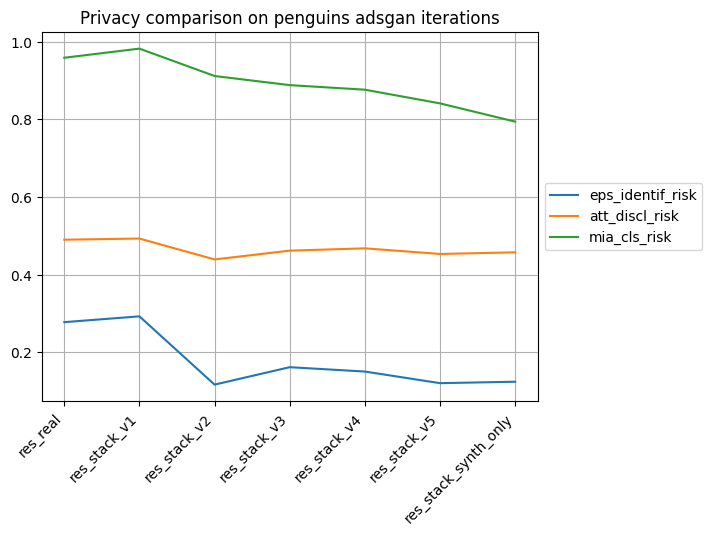

In [107]:
privacy_plot.plot.line()
plt.title("Privacy comparison on penguins adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [108]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,1.632561
res_stack_v1,1.766202
res_stack_v2,2.414695
res_stack_v3,2.231021
res_stack_v4,2.227496
res_stack_v5,2.710017
res_stack_synth_only,2.738454


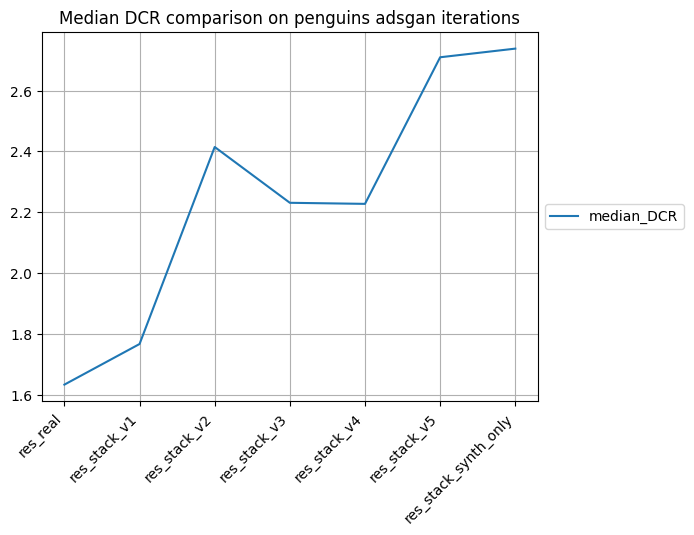

In [109]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on penguins adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [110]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.053061,0.045026,0.074773
res_stack_v1,0.091054,0.076157,0.058089
res_stack_v2,0.121359,0.107590,0.096663
res_stack_v3,0.125317,0.109874,0.085203
res_stack_v4,0.113004,0.100116,0.130381
res_stack_v5,0.107047,0.085663,0.119811
res_stack_synth_only,0.135042,0.116309,0.124423


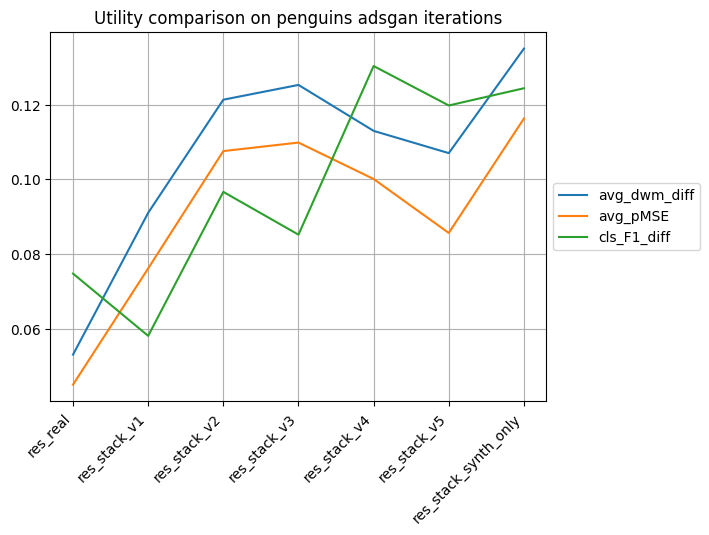

In [111]:
utility_plot.plot.line()
plt.title("Utility comparison on penguins adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [112]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.694873
res_stack_v1,0.794939
res_stack_v2,0.921754
res_stack_v3,0.904262
res_stack_v4,1.139875
res_stack_v5,1.125751
res_stack_synth_only,1.532735


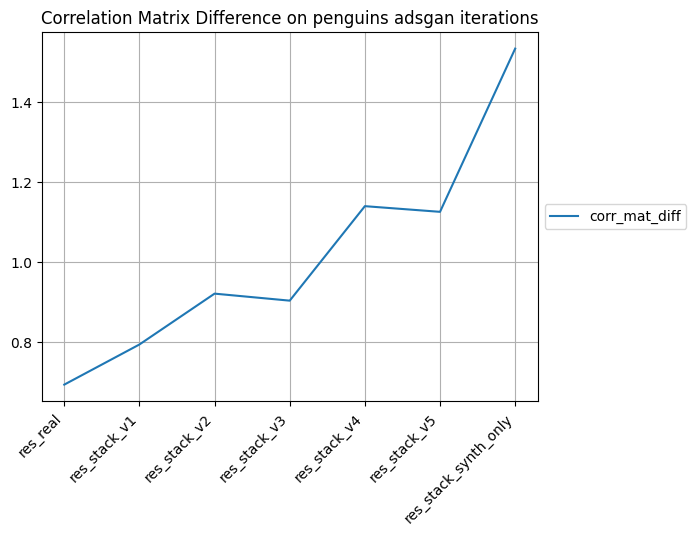

In [113]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on penguins adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [114]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.053061,0.003889,0.065583,0.000000,0.694873,0.718644,0.119193,0.571429,0.110178,0.045026,0.786891,0.007892,0.709474,-0.070917,0.074773,0.070896,0.052434,0.277154,0.958824,0.489735
res_stack_v1,0.091054,0.067287,0.049750,0.000000,0.794939,0.645164,0.138778,0.571429,0.014158,0.076157,0.828372,0.000882,0.714335,-0.106624,0.058089,0.078358,0.033708,0.292135,0.982353,0.492729
res_stack_v2,0.121359,0.125954,0.020722,0.000000,0.921754,0.659454,0.158704,0.571429,0.007390,0.107590,0.827157,-0.048538,0.865225,-0.169702,0.096663,0.111940,0.014981,0.116105,0.911765,0.438837
res_stack_v3,0.125317,0.090772,0.010304,0.101581,0.904262,0.622149,0.190551,0.571429,0.013798,0.109874,0.831037,0.003914,0.833771,-0.153671,0.085203,0.041045,0.000000,0.161049,0.888235,0.461506
res_stack_v4,0.113004,0.099735,0.031568,0.000000,1.139875,0.700781,0.193736,0.571429,0.015945,0.100116,0.817784,-0.023311,0.845752,-0.161424,0.130381,0.123134,0.011236,0.149813,0.876471,0.467494
res_stack_v5,0.107047,0.068463,0.059732,0.195613,1.125751,0.687130,0.173345,0.714286,0.021505,0.085663,0.802121,-0.026471,0.853249,-0.145537,0.119811,0.111940,0.018727,0.119850,0.841176,0.452951
res_stack_synth_only,0.135042,0.186043,0.098291,0.000000,1.532735,0.716333,0.236614,0.714286,0.113958,0.116309,0.831127,-0.020992,0.873080,-0.143229,0.124423,0.130597,0.007491,0.123596,0.794118,0.457228


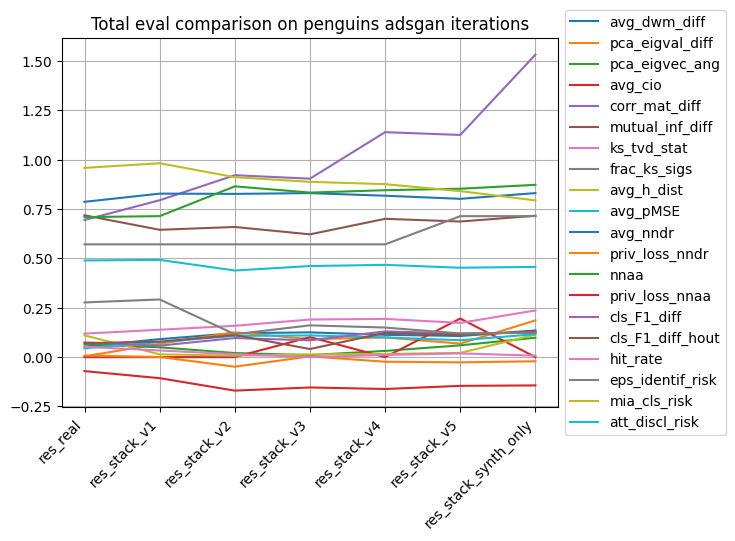

In [115]:
total_eval.plot.line()
plt.title("Total eval comparison on penguins adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [116]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.770678,0.732045
1,res_stack_v1,0.759805,0.732892
2,res_stack_v2,0.725314,0.763922
3,res_stack_v3,0.741095,0.767481
4,res_stack_v4,0.723748,0.763133
5,res_stack_v5,0.736767,0.773574
6,res_stack_synth_only,0.683257,0.784518


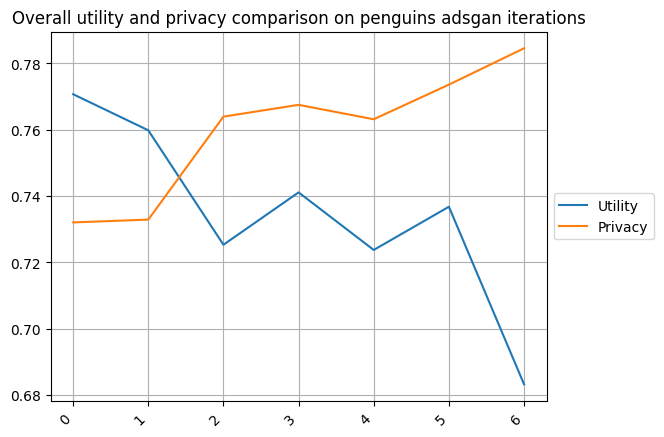

In [117]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on penguins adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()